In [2]:
import os
import pandas as pd
import seaborn as sns

In [3]:
# Global Variables
CURR_DIR_PATH = os.path.dirname(os.path.realpath('__file__'))
file_path = CURR_DIR_PATH + '/Bostader/clean/'
files     = os.listdir(file_path)
df_list   = [] 


In [4]:
for file in files:
    if file.startswith('clean'):
        # print(file_path + file)
        df = pd.read_csv(
            file_path + file,
            index_col  = False,
            engine     = 'python',
            skipfooter = 6)
        df_list.append(df)

In [7]:
big_df = df_list[0]
# big_df.merge(df_list[1], on = 'år', how = 'right')
for df in df_list[1:]:
    if 'år' in df.columns:
        big_df = big_df.merge(df, on = 'år', how = 'left')
    else:
        big_df = big_df.merge(df)
# print(big_df.isna().sum())
big_df = big_df.fillna(0.0)
# dfc = big_df.dropna()
# dfc
big_df.replace('..', 0.0)

,år,Antal,Medelpris_i_tkr,Medianpris_i_tkr,Fastighetsprisindex_för_lantbruk_1992=100,ålder,Medelvärde__tkr,Medianvärde_tkr,Medelvärde_procent_av_samtliga_hushåll,Medianvärde_procent_av_samtliga_hushåll,Fastighetsprisindex_för_fritidshus_(1981=100),Genomsnittlig_årshyra_per_kvm_kr,±_Felmarginal_kr,Fastighetsprisindex_för_permanenta_småhus_(1981=100)
0,2000,72392,390,173,154,0.0,0.0,0.0,0.0,0.0,306,724.0,3.0,263
1,2001,72096,441,225,165,0.0,0.0,0.0,0.0,0.0,335,732.0,4.0,284
2,2002,76297,526,295,168,0.0,0.0,0.0,0.0,0.0,358,755.0,4.0,302
3,2003,81161,571,360,172,0.0,0.0,0.0,0.0,0.0,383,774.0,3.0,322
4,2004,84787,671,455,190,0.0,0.0,0.0,0.0,0.0,424,798.0,3.0,353
5,2005,89848,776,530,207,0.0,0.0,0.0,0.0,0.0,470,818.0,3.0,387
6,2006,92697,933,650,235,0.0,0.0,0.0,0.0,0.0,527,826.0,3.0,431
7,2007,99455,1117,795,264,0.0,0.0,0.0,0.0,0.0,588,842.0,3.0,477
8,2008,89899,1080,800,296,0.0,0.0,0.0,0.0,0.0,603,867.0,3.0,491
9,2009,94717,1193,880,298,0.0,0.0,0.0,0.0,0.0,633,898.0,3.0,501


/var/folders/zp/5r258fdx3594f_r2rrqmfj5m0000gn/T/ipykernel_1335/2666004595.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(big_df.corr(), cmap = "Greens", annot = True, fmt = ".1f")


<AxesSubplot: >

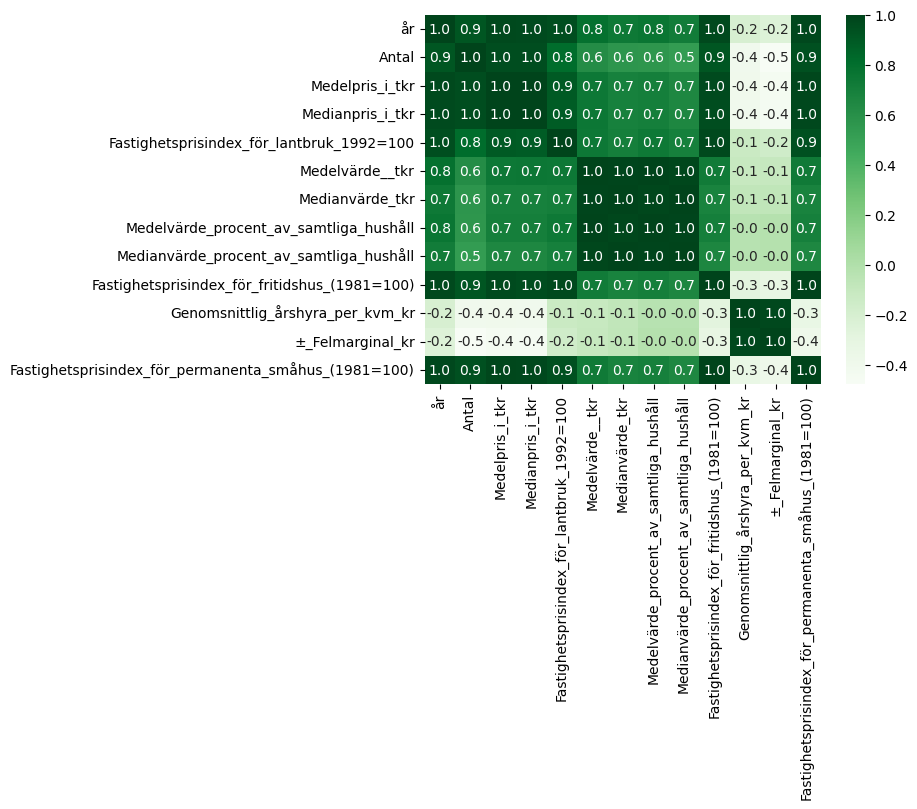

In [8]:
sns.heatmap(big_df.corr(), cmap = "Greens", annot = True, fmt = ".1f")

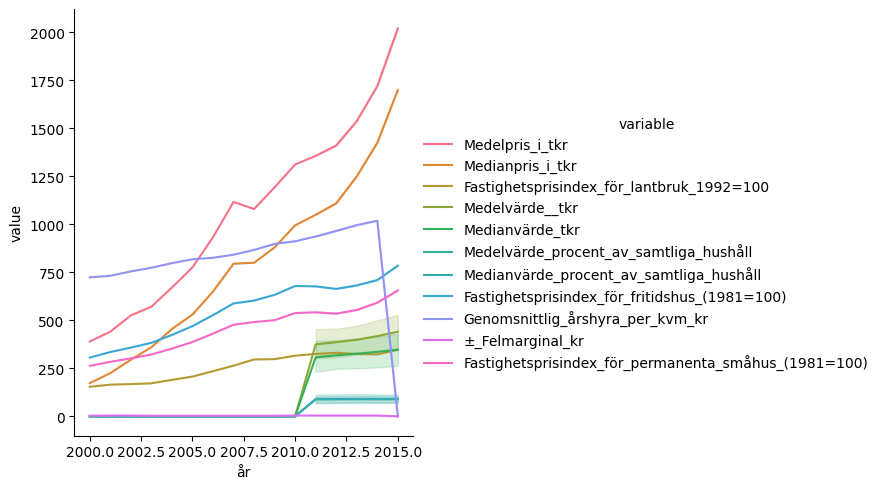

In [10]:
# print(big_df.columns)
# sns.relplot(
#     data = big_df, 
#     kind = 'line',
#     x = 'år',
#     y = 'Antal')
sns.relplot(
    data = pd.melt(big_df.drop(['ålder', 'Antal'], axis = 1), ['år']),
    x    = 'år',
    y    = 'value',
    hue  = 'variable',
    kind = 'line',
    )

In [11]:
clean_el = CURR_DIR_PATH + '/Bostader/clean/clean_Tillförsel_av_el-energi.csv'

df = pd.read_csv(clean_el)
df_melt = pd.melt(df, ['år'])

sns.relplot(
    data = df, 
    x    = 'år',
    y    = 'Brutto',
    kind = 'line',
    )
sns.relplot(
    data = df, 
    x    = 'år',
    y    = 'Egenanvändning',
    kind = 'line',
    )
sns.relplot(
    data = pd.melt(df, ['år']), 
    x    = 'år',
    y    = 'value',
    hue  = 'variable',
    kind = 'line',
    )

FileNotFoundError: [Errno 2] No such file or directory: '/Users/alexanderhansson/Documents/Project_IDEAs/EkonomiSCB/Bostader/clean/clean_Tillförsel_av_el-energi.csv'